In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

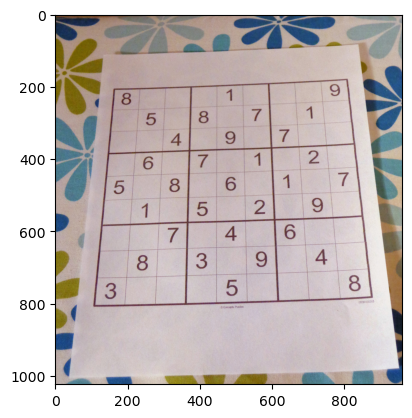

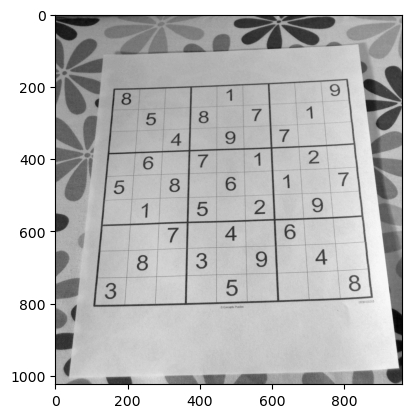

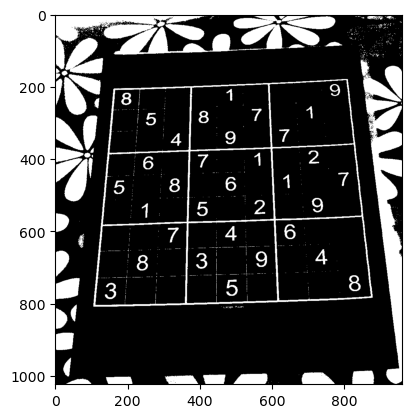

nlabels= 1240


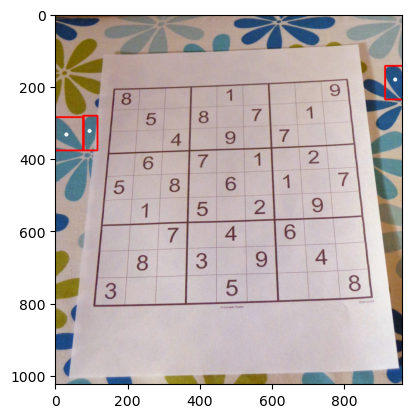

In [5]:
img=cv2.imread (r'C:\Users\DELL\Downloads\sudoku.jpg')
imgrgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb,cmap='gray')
plt.show()
imggray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(imggray,cmap='gray')
plt.show()
ret,imgbin=cv2.threshold(imggray,230,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
plt.imshow(imgbin,cmap='gray')
plt.show()
nlabels,labels,stats,centroid=cv2.connectedComponentsWithStats(imgbin,connectivity=4)
print("nlabels=",nlabels)
copy=imgrgb.copy()
for i in range(1,nlabels):
    mask=(labels==i).astype('uint8')
    andd=cv2.bitwise_and(imgrgb,imgrgb,mask=mask)
    x,y,w,h,area=stats[i]
    #crop=imgrgb[y:y+h,x:x+w]
    (cx,cy)=centroid[i].astype(int)
    if h>80 and h<100 and w>10 and w<80:
        cv2.rectangle(copy,(x,y),(x+w,y+h),(255,0,0),3)
        cv2.circle(copy,(cx,cy),3,(255,255,255),3)
plt.imshow(copy,cmap='gray')
plt.show()

In [7]:
def imread_rgb(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

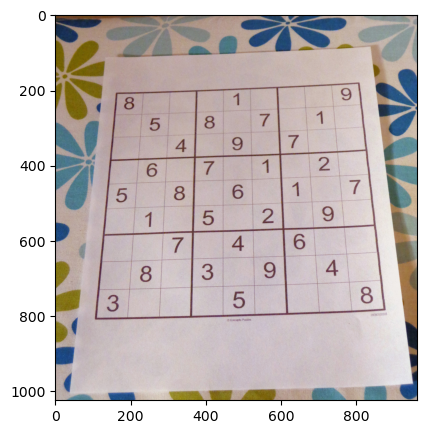

In [8]:
img_sudoku = imread_rgb(r'C:\Users\DELL\Downloads\sudoku.jpg')
imshow(img_sudoku)

In [9]:
def detect_connected_components(
        img_rgb, 
        w_range=None, 
        h_range=None,
):
    # convert image to gray
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    # convert gray image to binary
    t, img_bin = cv2.threshold(
        img_gray, 
        0, 
        255, 
        cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV
    )

    # detect connected components
    components = cv2.connectedComponentsWithStats(
        img_bin, connectivity=4)
    (nLabels, labels, stats, centroids) = components
    centroids = centroids.astype(int)

    # copy image to avoid drawing on the original image
    img = img_rgb.copy()

    # loop through components
    for i in range(1, nLabels):
        x, y, w, h, area = stats[i]
        (cx, cy) = centroids[i]   

        # by default, there is no limit for width or height
        acceptWidth = True
        acceptHeight = True
        
        # check the width, and height are within range (if defined)
        if w_range:
            acceptWidth = (w > w_range[0] and w < w_range[1])
        if h_range:
            acceptHeight = (h > h_range[0] and h < h_range[1])
        
        # draw location if width and height are accepted
        if acceptWidth and acceptHeight:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
            cv2.circle(img, (cx, cy), 4, (255, 255, 255), -1)

    # show image with locations of detected components
    imshow(img, figsize=(10, 10))

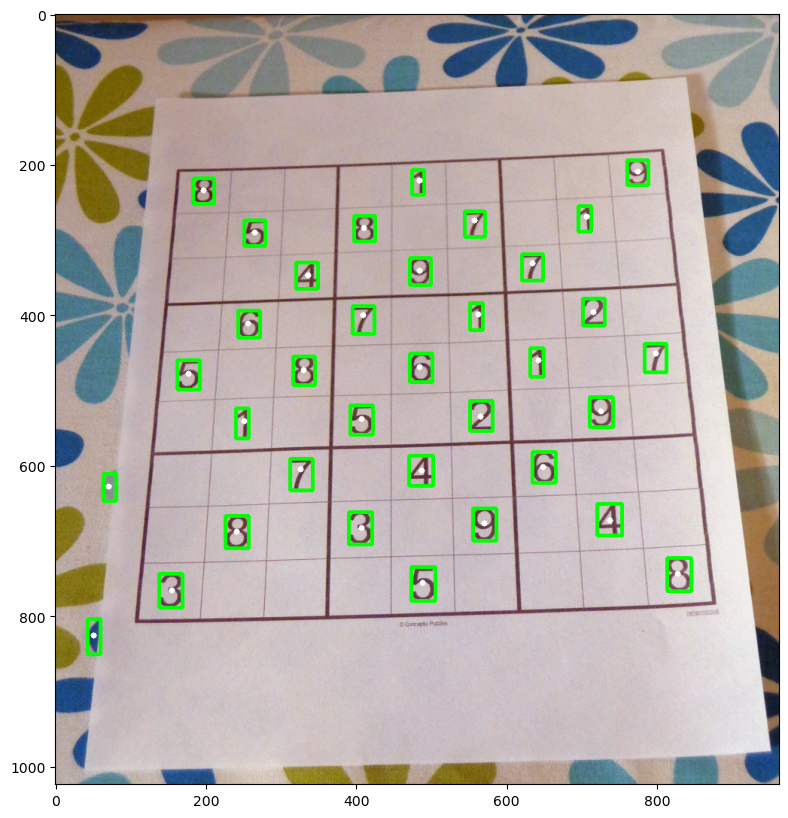

In [10]:
detect_connected_components(
    img_sudoku, 
    w_range=(15, 50), 
    h_range=(20, 50),
)

In [11]:
def imread(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def rgb2bin(img):
    img = rgb2gray(img)
    t, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    return img_bin

def imshow(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

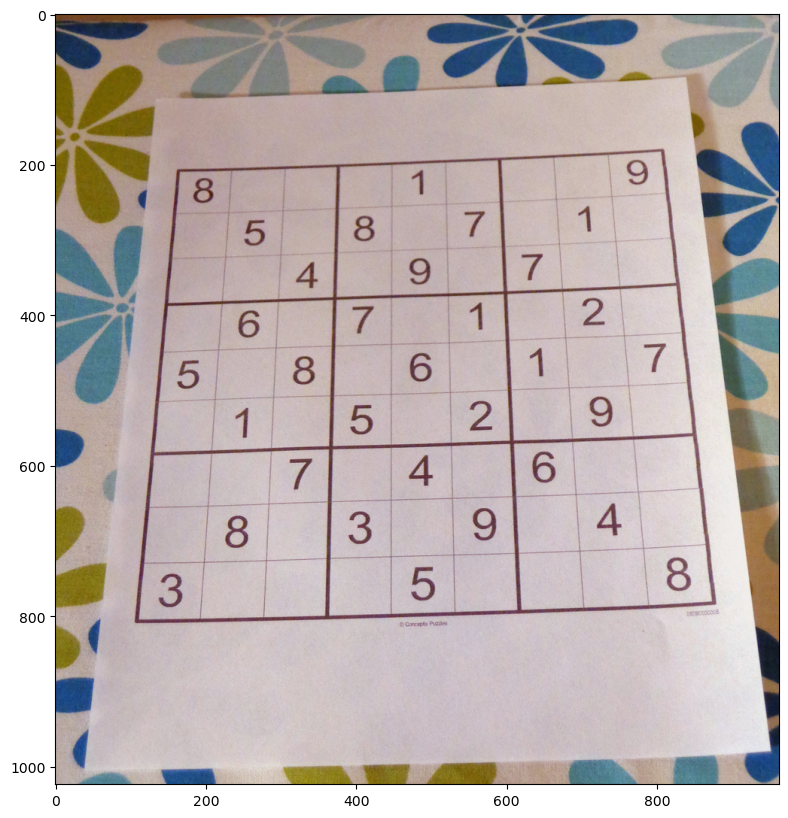

In [10]:
img_shapes = imread(r'C:\Users\DELL\Downloads\sudoku.jpg')
imshow(img_shapes)

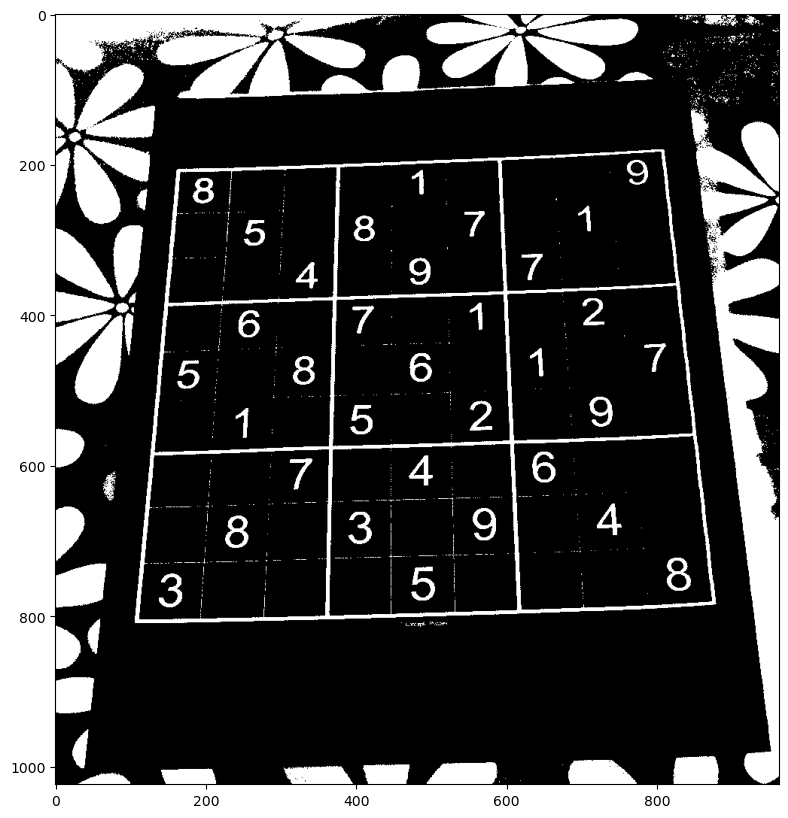

In [11]:
img_shapes_bin = rgb2bin(img_shapes)
imshow(img_shapes_bin)

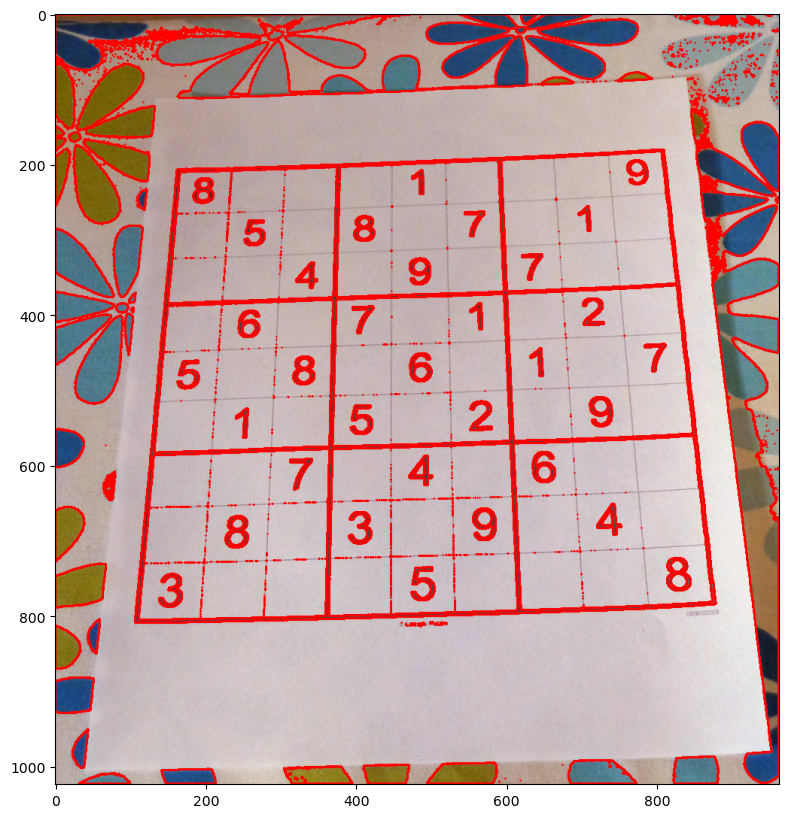

In [12]:
contours, hierarchy = cv2.findContours(img_shapes_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_copy = img_shapes.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
imshow(img_copy)

In [13]:
contours[4].shape

(4, 1, 2)

In [14]:
hierarchy

array([[[   1,   -1,   -1,   -1],
        [   2,    0,   -1,   -1],
        [   3,    1,   -1,   -1],
        ...,
        [1363, 1361,   -1, 1273],
        [1364, 1362,   -1, 1273],
        [  -1, 1363,   -1, 1273]]], dtype=int32)

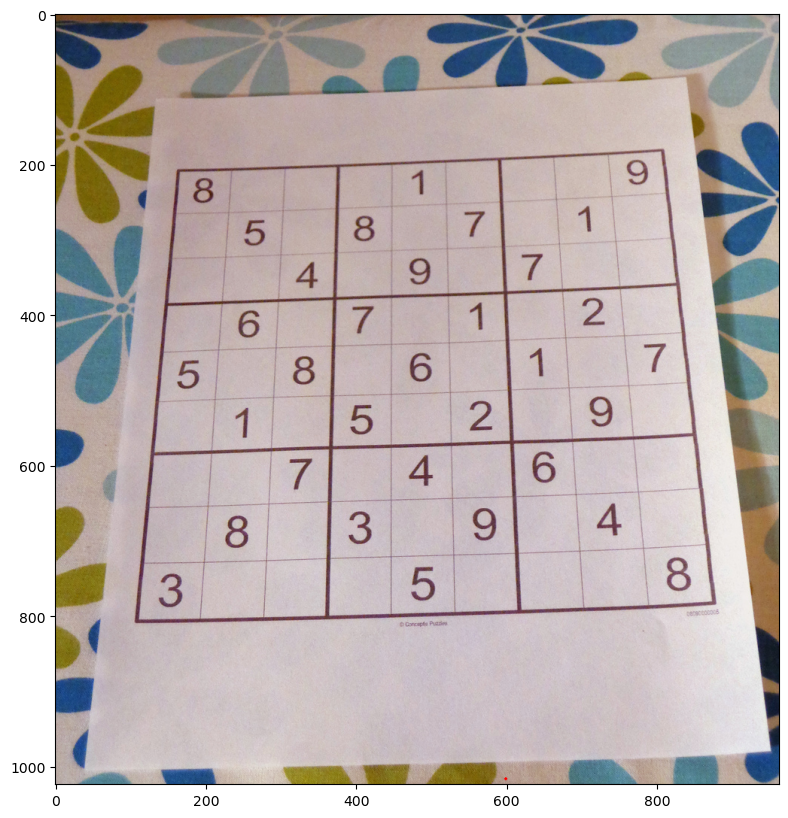

In [17]:
(x, y, w, h) = cv2.boundingRect(contours[2])

img_copy = img_shapes.copy()
cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
imshow(img_copy)

In [18]:
cv2.contourArea(contours[4])

2.0

In [19]:
sortedContours = sorted(contours, key=cv2.contourArea, reverse=True)
largestContour = sortedContours[0]

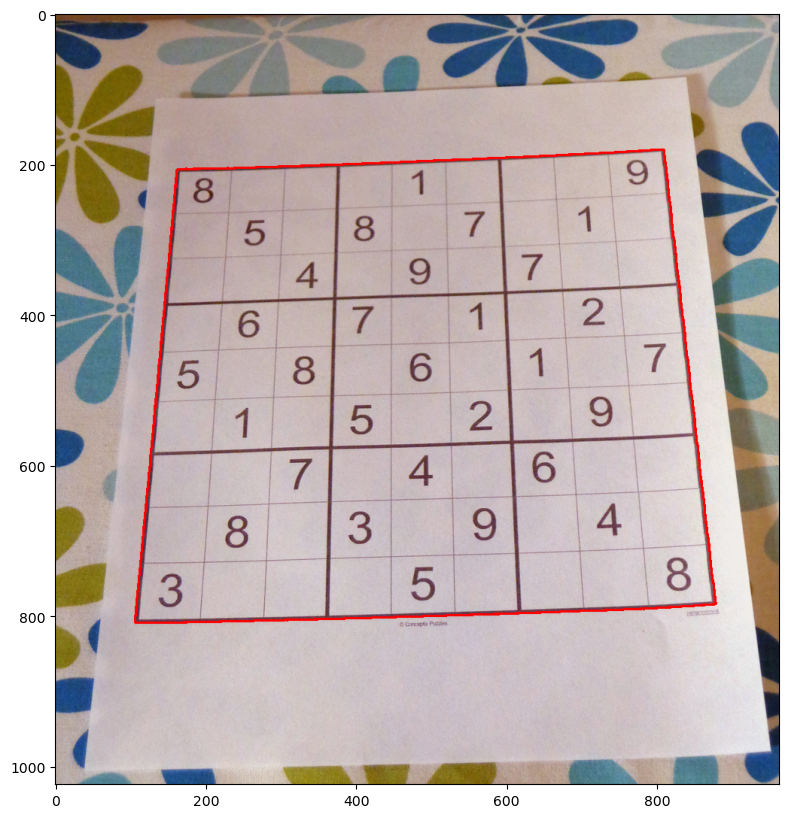

In [57]:
img_copy = img_shapes.copy()
cv2.drawContours(img_copy, [largestContour], 0, (255, 0, 0), 2)
imshow(img_copy)